# 앙상블 학습
여러 모델로부터 예측을 수집, 일련의 예측기를 앙상블

### 랜덤 포레스트
결정 트리의 앙상블


### 투표 기반 분류기
분류기 여러개를 훈련시킨 모델을 다수결 투표로 분류 : 직접 투표 분류기

앙상블 기법은 A, B 클래스 중 A 확률이 나올 확률이 51퍼센트인 어떤 이진 분류기들 1000개를 구축했을 때, 75퍼센트의 정확도를 기대할 수 있다. 
(정확도가 51%에서 75%로 증가함)

수학적 원리는 이항분포와 확률 질량함수로 계산할 수 있다. 

그러나 분류기들이 대부분 같은 오류를 만들어 내기 때문에 앙상블의 정확도가 낮아진다. 
앙상블 기법은 각각의 모델들이 서로 독립적일 때 최고의 성능을 발휘한다. 

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=500, noise=0.30, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [30]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

log_clf = LogisticRegression()
rnd_clf = RandomForestClassifier()
svm_clf = SVC()

voating_clf = VotingClassifier(
    estimators=[('lr', log_clf), ('rf', rnd_clf), ('svc', svm_clf)],
    voting= 'hard'
)
voating_clf.fit(X_train, y_train)

VotingClassifier(estimators=[('lr', LogisticRegression()),
                             ('rf', RandomForestClassifier()), ('svc', SVC())])

In [31]:
from sklearn.metrics import accuracy_score
for clf in (log_clf, rnd_clf, svm_clf, voating_clf):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

LogisticRegression 0.864
RandomForestClassifier 0.912
SVC 0.896
VotingClassifier 0.904


### Bagging & Pasting

Bagging : 훈련 세트에서 중복을 허용하여 샘플링하는 방식

Pasting : 훈련 세트에서 중복을 허용하지 않고 샘플링하는 방식

배깅만이 한 예측기를 위해 같은 훈련 샘플을 여러 번 샘플링할 수 있다.

In [32]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

bag_clf = BaggingClassifier(
    DecisionTreeClassifier(), n_estimators=500,
    max_samples=100, bootstrap=True, n_jobs=1
) # bootstrap = True : bagging, False : pasting

bag_clf.fit(X_train, y_train)
y_pred = bag_clf.predict(X_test)

### oob 평가
bagging 사용 시 무작위로 샘플을 선택하기 때문에 선택되지 않는 샘플이 있을 수 있다. 

평균적으로 63% 정도만 샘플링 된다. 
남겨진 샘플에 대해 oob라 한다. 

In [33]:
bag_clf = BaggingClassifier(
    DecisionTreeClassifier(), n_estimators=500,
    bootstrap=True, n_jobs=1, oob_score=True
)
bag_clf.fit(X_train, y_train)
bag_clf.oob_score_

0.9013333333333333

In [34]:
from sklearn.metrics import accuracy_score
y_pred = bag_clf.predict(X_test)
accuracy_score(y_test, y_pred)

0.904

decision_funciton
음성 클래스에 속할 확률 , 양성 클래스에 속할 확률

In [35]:
bag_clf.oob_decision_function_

array([[0.33823529, 0.66176471],
       [0.3315508 , 0.6684492 ],
       [1.        , 0.        ],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [0.09189189, 0.90810811],
       [0.41346154, 0.58653846],
       [0.0052356 , 0.9947644 ],
       [0.99502488, 0.00497512],
       [0.98214286, 0.01785714],
       [0.78238342, 0.21761658],
       [0.        , 1.        ],
       [0.76836158, 0.23163842],
       [0.79459459, 0.20540541],
       [0.98421053, 0.01578947],
       [0.05154639, 0.94845361],
       [0.        , 1.        ],
       [0.98895028, 0.01104972],
       [0.96446701, 0.03553299],
       [1.        , 0.        ],
       [0.04      , 0.96      ],
       [0.29081633, 0.70918367],
       [0.8839779 , 0.1160221 ],
       [1.        , 0.        ],
       [0.98941799, 0.01058201],
       [0.        , 1.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [0.        , 1.        ],
       [0.6344086 , 0.3655914 ],
       [0.

### 랜덤 포레스트
배깅 방법을 적용한 결정 트리의 앙상블
전형적으로 max_samples를 훈련 세트의 크기로 지정한다. (전체 데이터 셋 아님)



In [36]:
from sklearn.ensemble import RandomForestClassifier

rnd_clf = RandomForestClassifier(n_estimators= 500, max_leaf_nodes= 16, n_jobs= -1)
rnd_clf.fit(X_train, y_train)

y_pred_rf = rnd_clf.predict(X_test)

[Text(0.6397058823529411, 0.95, 'x[0] <= 1.31\ngini = 0.5\nsamples = 247\nvalue = [189, 186]'),
 Text(0.45588235294117646, 0.85, 'x[0] <= -0.554\ngini = 0.474\nsamples = 200\nvalue = [187, 118]'),
 Text(0.39705882352941174, 0.75, 'gini = 0.0\nsamples = 34\nvalue = [57, 0]'),
 Text(0.5147058823529411, 0.75, 'x[0] <= 1.166\ngini = 0.499\nsamples = 166\nvalue = [130, 118]'),
 Text(0.3235294117647059, 0.65, 'x[1] <= 0.102\ngini = 0.5\nsamples = 146\nvalue = [105, 107]'),
 Text(0.11764705882352941, 0.55, 'x[0] <= 0.839\ngini = 0.167\nsamples = 59\nvalue = [8, 79]'),
 Text(0.058823529411764705, 0.45, 'gini = 0.092\nsamples = 46\nvalue = [3, 59]'),
 Text(0.17647058823529413, 0.45, 'x[0] <= 0.934\ngini = 0.32\nsamples = 13\nvalue = [5, 20]'),
 Text(0.11764705882352941, 0.35, 'gini = 0.278\nsamples = 3\nvalue = [5, 1]'),
 Text(0.23529411764705882, 0.35, 'gini = 0.0\nsamples = 10\nvalue = [0, 19]'),
 Text(0.5294117647058824, 0.55, 'x[1] <= 0.777\ngini = 0.348\nsamples = 87\nvalue = [97, 28]'),
 

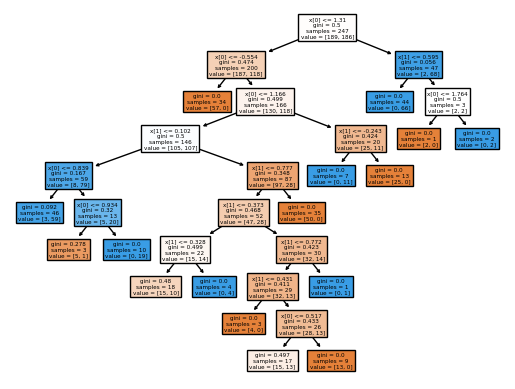

In [37]:
from sklearn.tree import plot_tree

# 예시: 첫 번째 트리를 시각화
plot_tree(rnd_clf.estimators_[0], filled=True)

### 특성 중요도
랜덤 포레스트는 상대적 중요도를 측정하기 쉽다. 

평균적으로 불순도를 얼마나 감소시키는지 확인하여 특성의 중요도를 측정한다. 특성마다 자동으로 이 점수를 계산하고 중요도의 전체 합이 1이되도록 결과값을 정규화한다. 아래 petal length, petal width가 중요한 특성으로 보인다.

In [38]:
from sklearn.datasets import load_iris
iris = load_iris()
rnd_clf = RandomForestClassifier(n_estimators=500, n_jobs=-1)

rnd_clf.fit(iris["data"], iris["target"])
for name, score in zip(iris["feature_names"], rnd_clf.feature_importances_):
    print(name, score)

sepal length (cm) 0.09878245506668855
sepal width (cm) 0.024262244359029034
petal length (cm) 0.43622375280713876
petal width (cm) 0.44073154776714357


In [39]:
from sklearn.ensemble import AdaBoostClassifier

ada_clf = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=1), n_estimators=200,
    algorithm="SAMME.R", learning_rate=0.5
)
ada_clf.fit(X_train, y_train)

AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=1),
                   learning_rate=0.5, n_estimators=200)

In [40]:
from sklearn.metrics import accuracy_score

y_pred = ada_clf.predict(X_test)
accuracy_score(y_test, y_pred)

0.896

### 그레디언트 부스팅
앙상블에 이전까지의 오차를 보정하도록 예측기를 순차적으로 추가한다. 
에이다부스트처럼 반복마다 샘플의 가중치를 수정하는 대신 이전 예측기가 만든 잔여 오차에 새로운 예측기를 학습시킨다.

#### 그레이디언트 트리 부스팅 / 그레이디언트 부스티드 회귀 트리
결정트리 기반 예측기 (회귀 또는 분류문제에 적용 가능)


In [62]:
import numpy as np
np.random.seed(42)
X = np.random.rand(100, 1) - 0.5
y = 3*X[:, 0]**2 + 0.05 * np.random.randn(100)

In [63]:
from sklearn.tree import DecisionTreeRegressor

tree_reg1 = DecisionTreeRegressor(max_depth=2, random_state=42)
tree_reg1.fit(X, y)

y2 = y - tree_reg1.predict(X)
tree_reg2 = DecisionTreeRegressor(max_depth=2, random_state=42)
tree_reg2.fit(X, y2)

DecisionTreeRegressor(max_depth=2, random_state=42)

In [64]:
y3 = y2 - tree_reg2.predict(X)
tree_reg3 = DecisionTreeRegressor(max_depth=2, random_state=42)
tree_reg3.fit(X, y)

DecisionTreeRegressor(max_depth=2, random_state=42)

In [65]:
import numpy as np
X_new = np.array([[0.8]])
y_pred = sum(tree.predict(X_new) for tree in (tree_reg1, tree_reg2, tree_reg3))
# y_pred = sum(tree.predict(X_new) for tree in (tree_reg1, tree_reg2, tree_reg3))

In [66]:
y_pred

array([1.0970499])